In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
m = pd.read_csv("measurements.csv")

In [3]:
mod = sm.OLS(m.BMI_init, m.height_init)
mod.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               BMI_init   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              5571.
Date:                Fri, 12 Apr 2024   Prob (F-statistic):                    5.08e-75
Time:                        19:00:36   Log-Likelihood:                         -209.16
No. Observations:                  80   AIC:                                      420.3
Df Residuals:                      79   BIC:                                      422.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
height_init     0.1786      0.002     74.638      0.000       0.174       0.183
==============================================================================
Omnibus:                        0.719   Durbin-Watson:                   1.101
Prob(Omnibus):                  0.698   Jarque-Bera (JB):                0.621
Skew:                           0.212   Prob(JB):                        0.733
Kurtosis:                       2.920   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
modct = sm.OLS(m.BMI_init, sm.add_constant((m.height_init)**(-0.5)))

In [5]:
modct.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               BMI_init   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.1273
Date:                Fri, 12 Apr 2024   Prob (F-statistic):              0.722
Time:                        19:00:37   Log-Likelihood:                -198.25
No. Observations:                  80   AIC:                             400.5
Df Residuals:                      78   BIC:                             405.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          23.5395     11.959      1.968      0.053      -0.268      47.347
height_init    53.0750    148.742      0.357      0.722    -243.048     349.198
==============================================================================
Omnibus:                        2.402   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.301   Jarque-Bera (JB):                1.898
Skew:                           0.371   Prob(JB):                        0.387
Kurtosis:                       3.137   Cond. No.                         458.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
mod_inv = sm.OLS(m.BMI_init, m.height_init**(-0.5)) 
#sm.add_constant(m.height_init**(-0.5)))          tried using constant first time but the model was very poor

In [7]:
mod_inv.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               BMI_init   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              6993.
Date:                Fri, 12 Apr 2024   Prob (F-statistic):                    7.15e-79
Time:                        19:00:37   Log-Likelihood:                         -200.18
No. Observations:                  80   AIC:                                      402.4
Df Residuals:                      79   BIC:                                      404.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
height_init   345.7515      4.135     83.623      0.000     337.522     353.981
==============================================================================
Omnibus:                        2.010   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.366   Jarque-Bera (JB):                1.623
Skew:                           0.348   Prob(JB):                        0.444
Kurtosis:                       3.059   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

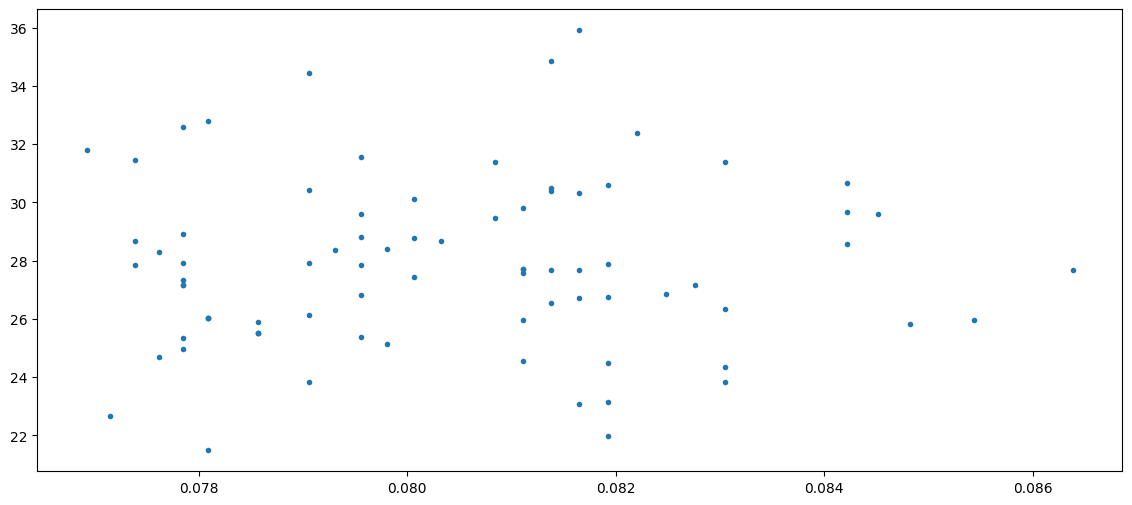

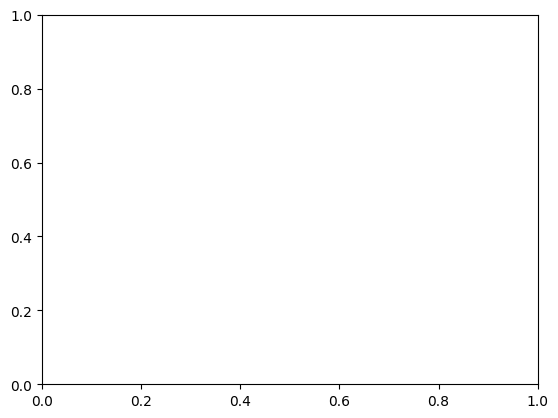

In [8]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(m.height_init**(-0.5), mod_inv.endog, 'o', markersize = 3, label = 'data')
#ax.plot(m.height_init, mod_inv.fit().fittedvalues, 'd--', linewidth = 0.5, markersize = 3, label = 'model')
ax.plot(m.height_init**(-0.5), mod_inv.fit().get_prediction().summary_frame().drop(columns = 'mean_se'), '-', linewidth = 0.1, markersize = 3, label = mod_inv.fit().get_prediction().summary_frame().drop(columns = 'mean_se').columns)
ax.plot(m.height_init**(-0.5), mod_inv.fit().get_prediction().summary_frame()['mean']-mod_inv.fit().get_prediction().summary_frame()['mean_se']*1.96, 'o', markersize = 1, color = 'red')
ax.legend(loc="best")
plt.show()

In [ ]:
mod_invct = sm.OLS(m.BMI_init, sm.add_constant((m.height_init)**(-0.5)))

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(m.height_init**(-0.5), mod_invct.endog, 'o', markersize = 3, label = 'data')
ax.plot(m.height_init**(-0.5), mod_inv.fit().fittedvalues, 'd--', linewidth = 0.1, markersize = 3, label = 'no ct model')
ax.plot(m.height_init**(-0.5), mod_invct.fit().fittedvalues, 'd--', linewidth = 0.1, markersize = 3, label = 'ct model')
#ax.plot(m.height_init**(-0.5), mod_invct.fit().get_prediction().summary_frame().drop(columns = 'mean_se'), '-', linewidth = 0.1, markersize = 3, label = mod_invct.fit().get_prediction().summary_frame().drop(columns = 'mean_se').columns)
ax.legend(loc="best")
plt.show()

In [ ]:
mod_invct.fit().summary()

In [ ]:
mod_invct.fit().centered_tss

In [ ]:
mod_invct.fit().ssr

In [ ]:
mod_invct.fit().ess

In [ ]:
mod_inv.fit().mse_resid

In [ ]:
mod_invct.fit().mse_resid

In [ ]:
mod.fit().mse_resid

In [ ]:
modct.fit().mse_resid

In [ ]:
mod_inv.fit().mse_resid**0.5

In [ ]:
mod_invct.fit().mse_resid**0.5

In [ ]:
mod.fit().mse_resid**0.5

In [ ]:
modct.fit().mse_resid**0.5